# 🐜🐝 Exploratory Data Analysis (EDA) - Ants vs Bees

## 1. الهدف
في هذا الـ  Notebookنستكشف بيانات النمل والنحل:
- عرض عينات من الصور.
- التأكد من توزيع الفئات (ants vs bees).
- فحص أحجام الصور.
- ملاحظات حول جودة البيانات.

---

## 2. استيراد المكتبات


In [3]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

## 3. مسار البيانات


In [5]:
data_dir = "../data/raw/train"
classes = ["ants", "bees"]

# تأكد من وجود المسارات
for cls in classes:
    path = os.path.join(data_dir, cls)
    print(cls, ":", len(os.listdir(path)), "صور")


ants : 122 صور
bees : 121 صور


## 4. عرض عينات من الصور


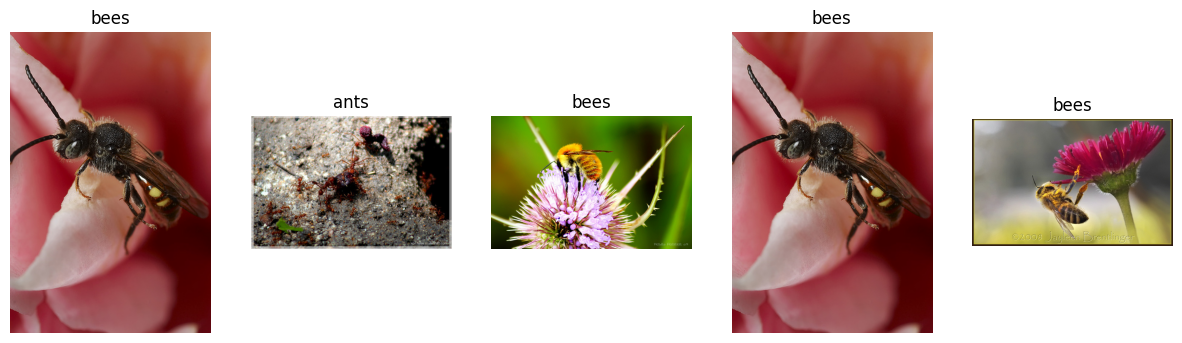

In [16]:
fig, axs = plt.subplots(1, 5, figsize=(15, 5))

for ax in axs:
    cls = random.choice(classes)
    img_name = random.choice(os.listdir(os.path.join(data_dir, cls)))
    img_path = os.path.join(data_dir, cls, img_name)
    img = Image.open(img_path)
    ax.imshow(img)
    ax.set_title(cls)
    ax.axis("off")

plt.show()


## 5. توزيع الصور بين الفئات


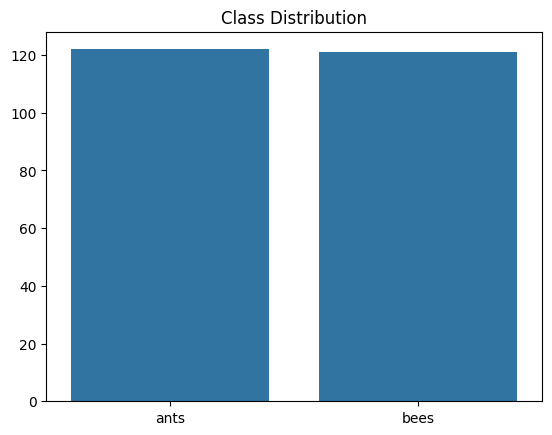

In [7]:
counts = {cls: len(os.listdir(os.path.join(data_dir, cls))) for cls in classes}
sns.barplot(x=list(counts.keys()), y=list(counts.values()))
plt.title("Class Distribution")
plt.show()


## 6. أحجام الصور


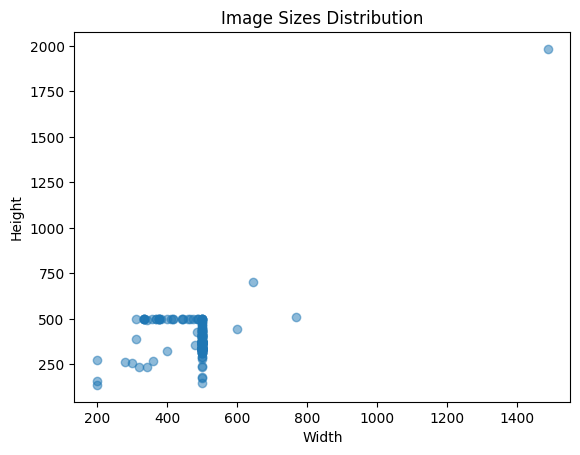

In [8]:
sizes = []
for cls in classes:
    folder = os.path.join(data_dir, cls)
    for img_name in os.listdir(folder):
        img = Image.open(os.path.join(folder, img_name))
        sizes.append(img.size)

widths, heights = zip(*sizes)

plt.scatter(widths, heights, alpha=0.5)
plt.xlabel("Width")
plt.ylabel("Height")
plt.title("Image Sizes Distribution")
plt.show()
